In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [38]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D, Flatten,AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [39]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

In [40]:
X_train.shape

(60000, 28, 28)

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

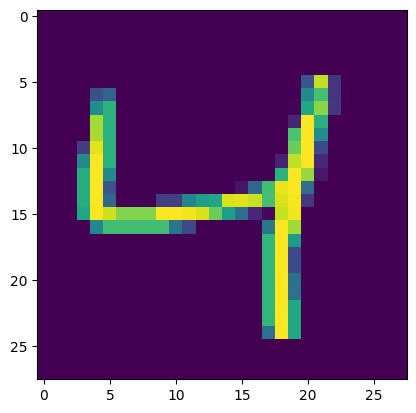

In [41]:
plt.imshow(X_train[2])

In [42]:
X_train = X_train/255
X_test = X_test/255

In [43]:
X_train = X_train.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [30]:
# model = Sequential()

# model.add(Conv2D(6, kernel_size =(5,5),padding = 'valid',activation = 'tanh',input_shape = (32,32,1)))
# model.add(AveragePooling2D(pool_size=(2,2),strides = 2,padding = 'valid'))

# model.add(Conv2D(16,kernel_size = (5,5),padding = 'valid',activation = 'tanh'))
# model.add(AveragePooling2D(pool_size = (2,2),strides =2,padding='valid'))

# model.add(Flatten())

# # fully connvected layers
# model.add(Dense(120,activation = 'tanh'))
# model.add(Dense(84,activation ='tanh'))
# model.add(Dense(10,activation = 'softmax'))


In [31]:
# model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)),  # Adjusted to (28, 28, 1)
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), activation='tanh'),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_9                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_10                 │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8632 - loss: 0.4643 - val_accuracy: 0.9629 - val_loss: 0.1238
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9670 - loss: 0.1049 - val_accuracy: 0.9717 - val_loss: 0.0897
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9805 - loss: 0.0660 - val_accuracy: 0.9789 - val_loss: 0.0701
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9858 - loss: 0.0478 - val_accuracy: 0.9805 - val_loss: 0.0627
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9882 - loss: 0.0380 - val_accuracy: 0.9801 - val_loss: 0.0676


In [49]:
y_prob  = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [50]:
y_pred = y_prob.argmax(axis=1)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9824

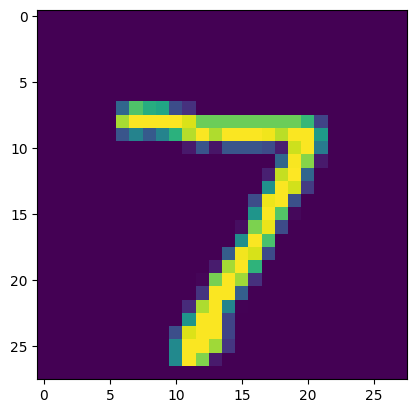

In [54]:
plt.imshow(X_test[0])

In [53]:
model.predict(X_test[0].reshape(1,28,28,1)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([7])

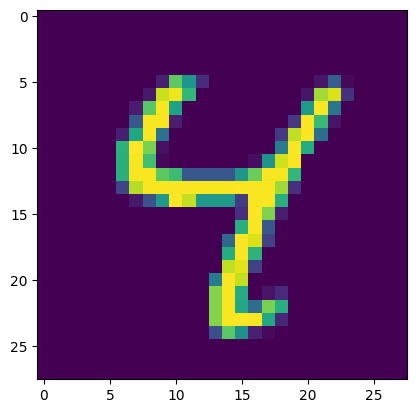

In [56]:
plt.imshow(X_test[6])

In [58]:
model.predict(X_test[6].reshape(1,28,28,1)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([4])